## Github Link 
https://github.com/Faizhussain224/EMIPredictAI


## 🚀 Deployment
The project is live on **Streamlit Cloud**:
🔗 [EMIPredict AI - Streamlit App](https://emipredictai-khaekd4z73tsymmix5pbu9.streamlit.app/)

# Project Title :- EMIPredict AI - Intelligent Financial Risk Assessment Platform by Faiz Hussain


## Problem Statement 
Build a comprehensive financial risk assessment platform that integrates machine learning models with MLflow experiment tracking to create an interactive web application for EMI prediction. Nowadays, people struggle to pay EMI due to poor financial planning and inadequate risk assessment. This project aims to solve this critical issue by providing data-driven insights for better loan decisions.


## Importing Required Libraries For Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import mlflow
import mlflow.sklearn
import joblib
import os
import warnings
warnings.filterwarnings("ignore")

## Loading Dataset & Dataset Overview

In [2]:
df = pd.read_csv("emi_prediction_dataset.csv")
print("✅ Dataset loaded successfully!")
print("Shape of dataset:", df.shape)
display(df.head())
display(df.tail())

✅ Dataset loaded successfully!
Shape of dataset: (404800, 27)


,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38,Female,Married,Professional,82600,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700,660.0,303200,70200.0,Personal Loan EMI,850000,15,Not_Eligible,500.0
1,38,Female,Married,Graduate,21500,Private,7.0,MNC,Family,0.0,...,Yes,4100,714.0,92500,26900.0,E-commerce Shopping EMI,128000,19,Not_Eligible,700.0
2,38,Male,Married,Professional,86100,Private,5.8,Startup,Own,0.0,...,No,0,650.0,672100,324200.0,Education EMI,306000,16,Eligible,27775.0
3,58,Female,Married,High School,66800,Private,2.2,Mid-size,Own,0.0,...,No,0,685.0,440900,178100.0,Vehicle EMI,304000,83,Eligible,16170.0
4,48,Female,Married,Professional,57300,Private,3.4,Mid-size,Family,0.0,...,No,0,770.0,97300,28200.0,Home Appliances EMI,252000,7,Not_Eligible,500.0


,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
404795,27,Male,Married,Graduate,32400,Private,5.0,Large Indian,Rented,10400.0,...,No,0,649.0,62000,32600.0,Personal Loan EMI,506000,47,Not_Eligible,500.0
404796,38,Male,Married,Post Graduate,49200,Private,1.9,MNC,Own,0.0,...,No,0,712.0,142200,38100.0,Personal Loan EMI,708000,33,Not_Eligible,5200.0
404797,32,Male,Single,Graduate,25700,Private,3.2,MNC,Rented,6300.0,...,No,0,676.0,191600,39700.0,Home Appliances EMI,93000,21,High_Risk,5665.0
404798,48,Male,Married,Graduate,47200,Private,3.0,MNC,Own,0.0,...,No,0,784.0,170400,45600.0,Home Appliances EMI,144000,36,Eligible,14460.0
404799,38,FEMALE,Married,Graduate,34900,Private,1.2,MNC,Family,0.0,...,No,0,641.0,214400,99400.0,Home Appliances EMI,77000,35,Eligible,8756.0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               402396 non-null  object 
 4   monthly_salary          404800 non-null  object 
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  int64  
 13  college_fees            404800 non-null  int64  
 14  trave

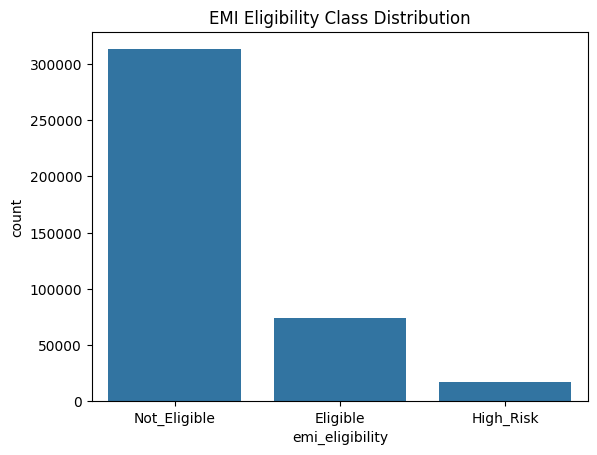

In [3]:
print("\nDataset Info:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nTarget Variable Distribution:")
sns.countplot(x='emi_eligibility', data=df)
plt.title("EMI Eligibility Class Distribution")
plt.show()

In [4]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
years_of_employment,404800.0,5.364079,6.079135,0.5,1.2,3.2,7.2,36.0
monthly_rent,402374.0,5828.446490,8648.604639,0.0,0.0,0.0,10600.0,80000.0
family_size,404800.0,2.940425,1.075199,1.0,2.0,3.0,4.0,5.0
dependents,404800.0,1.940425,1.075199,0.0,1.0,2.0,3.0,4.0
school_fees,404800.0,4624.575593,5061.074401,0.0,0.0,3000.0,9000.0,15000.0
college_fees,404800.0,4066.253706,7319.344289,0.0,0.0,0.0,6500.0,25000.0
travel_expenses,404800.0,5687.497777,3392.671132,600.0,3200.0,4900.0,7400.0,30300.0
groceries_utilities,404800.0,12804.999506,6993.853745,1800.0,7700.0,11400.0,16400.0,71200.0
other_monthly_expenses,404800.0,7119.309783,4510.447300,600.0,3800.0,6000.0,9300.0,42900.0
current_emi_amount,404800.0,4543.407609,7034.901139,0.0,0.0,0.0,8000.0,56300.0


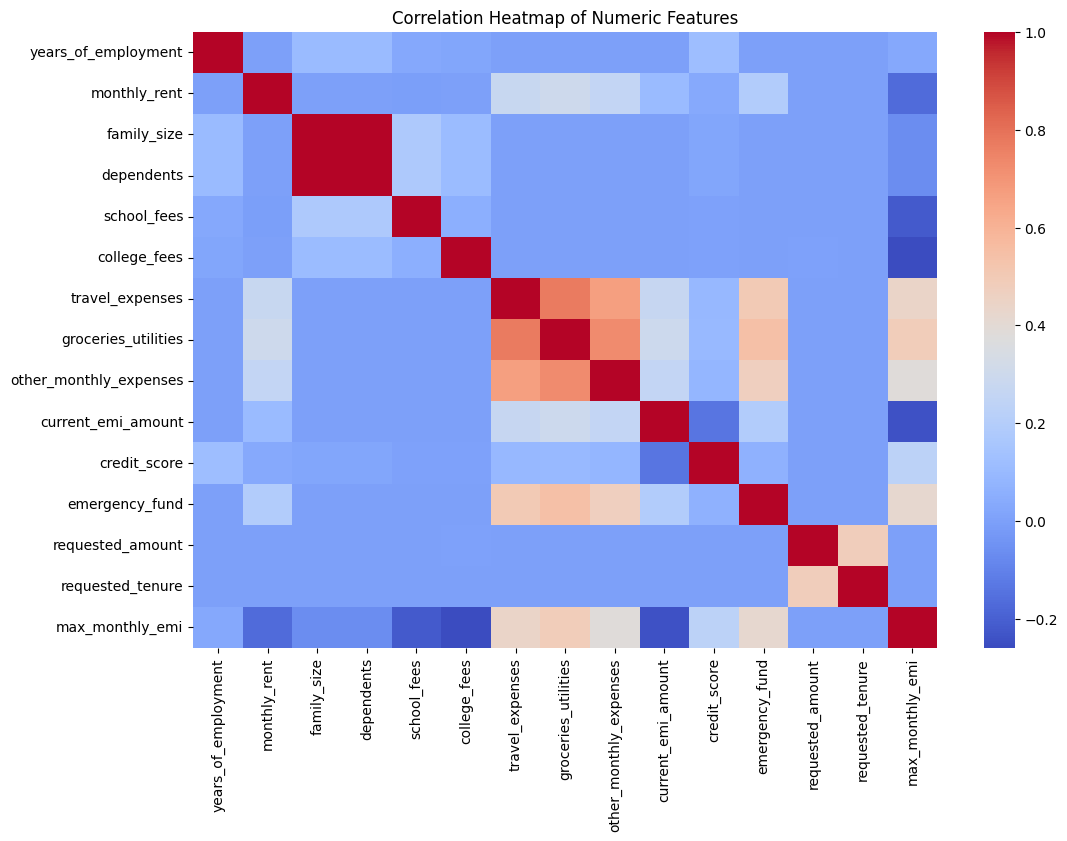

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

### Feature Engineering

In [6]:
# Convert potential numeric columns stored as strings
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = (
            df[col].astype(str)
            .str.replace(',', '')   # remove commas
            .str.replace('₹', '')   # remove currency symbols if any
            .str.replace('-', '0')  # replace dashes with 0
        )
        df[col] = pd.to_numeric(df[col], errors='ignore')

In [7]:
def col_or_zero(name):
    return pd.to_numeric(df[name], errors='coerce').fillna(0) if name in df.columns else 0

df['debt_to_income_ratio'] = col_or_zero('current_emi_amount') / (col_or_zero('monthly_salary') + 1)
df['expense_to_income_ratio'] = (
    col_or_zero('groceries_utilities') + col_or_zero('travel_expenses') +
    col_or_zero('school_fees') + col_or_zero('college_fees') +
    col_or_zero('other_monthly_expenses')
) / (col_or_zero('monthly_salary') + 1)
df['affordability_index'] = (
    col_or_zero('monthly_salary') -
    (col_or_zero('current_emi_amount') + col_or_zero('groceries_utilities') +
     col_or_zero('other_monthly_expenses'))
) / (col_or_zero('monthly_salary') + 1)
df['employment_stability'] = col_or_zero('years_of_employment') / (col_or_zero('age') + 1)
df['dependents_ratio'] = col_or_zero('dependents') / (col_or_zero('family_size') + 1)
df['housing_cost_ratio'] = col_or_zero('monthly_rent') / (col_or_zero('monthly_salary') + 1)

# Create risk_score
if 'credit_score' in df.columns:
    cs = col_or_zero('credit_score')
    cs_norm = (cs - 300) / (850 - 300)
    cs_norm = cs_norm.clip(0, 1).fillna(0)
else:
    cs_norm = 0

df['risk_score'] = (
    (cs_norm * 0.4)
    + ((1 - df['debt_to_income_ratio']).replace([np.inf, -np.inf], 0).fillna(0) * 0.3)
    + ((1 - df['expense_to_income_ratio']).replace([np.inf, -np.inf], 0).fillna(0) * 0.2)
    + (df['affordability_index'].replace([np.inf, -np.inf], 0).fillna(0) * 0.1)
)

print("✅ Feature Engineering completed successfully after type conversion!")
display(df.head())

✅ Feature Engineering completed successfully after type conversion!


,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,requested_tenure,emi_eligibility,max_monthly_emi,debt_to_income_ratio,expense_to_income_ratio,affordability_index,employment_stability,dependents_ratio,housing_cost_ratio,risk_score
0,38,Female,Married,Professional,82600,Private,0.9,Mid0size,Rented,20000.0,...,15,Not_Eligible,500.0,0.286921,0.483045,0.317187,0.023077,0.500000,0.242128,0.610851
1,38,Female,Married,Graduate,21500,Private,7.0,MNC,Family,0.0,...,19,Not_Eligible,700.0,0.190689,0.716246,0.395330,0.179487,0.333333,0.000000,0.640168
2,38,Male,Married,Professional,86100,Private,5.8,Startup,Own,0.0,...,16,Eligible,27775.0,0.000000,0.413468,0.704986,0.148718,0.600000,0.000000,0.742350
3,58,Female,Married,High School,66800,Private,2.2,Mid0size,Own,0.0,...,83,Eligible,16170.0,0.000000,0.559872,0.703582,0.037288,0.666667,0.000000,0.738384
4,48,Female,Married,Professional,57300,Private,3.4,Mid0size,Family,0.0,...,7,Not_Eligible,500.0,0.000000,1.022670,0.575906,0.069388,0.600000,0.000000,0.694875


## Data Preprocessing for Model Training

In [32]:
X = df.drop(columns=['emi_eligibility' ])
y = df['emi_eligibility']
# Encode target
le = LabelEncoder()
y = le.fit_transform(y)
print("\nEncoded Target Classes:", list(le. classes_))
# Select only numeric columns for training
X = X.select_dtypes(include=[np.number]).fillna(0)
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("\nTraining size:", X_train.shape, " | Test size:", X_test.shape)
# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




Encoded Target Classes: ['Eligible', 'High_Risk', 'Not_Eligible']

Training size: (323840, 22)  | Test size: (80960, 22)


## Machine Learning Model Development

### CLassification Model Training & Evaluation

{'Eligible': np.int64(74444), 'High_Risk': np.int64(17488), 'Not_Eligible': np.int64(312868)}
Class Weights: {np.int64(0): np.float64(1.812548134615729), np.int64(1): np.float64(7.715767002134797), np.int64(2): np.float64(0.4312787927603121)}

📈 Model: Logistic Regression
Accuracy: 0.8534
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82     14889
           1       0.22      0.81      0.35      3497
           2       0.99      0.88      0.93     62574

    accuracy                           0.85     80960
   macro avg       0.70      0.81      0.70     80960
weighted avg       0.94      0.85      0.89     80960


📈 Model: Random Forest
Accuracy: 0.9497
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94     14889
           1       0.85      0.04      0.07      3497
           2       0.95      1.00      0.98     62574

    accuracy          

,Model,Accuracy
0,Logistic Regression,0.853409
1,Random Forest,0.949654
2,XGBoost,0.984795


2025/11/01 20:49:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



🏆 Best Model: XGBoost


2025/11/01 20:49:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Model and Scaler logged to MLflow!


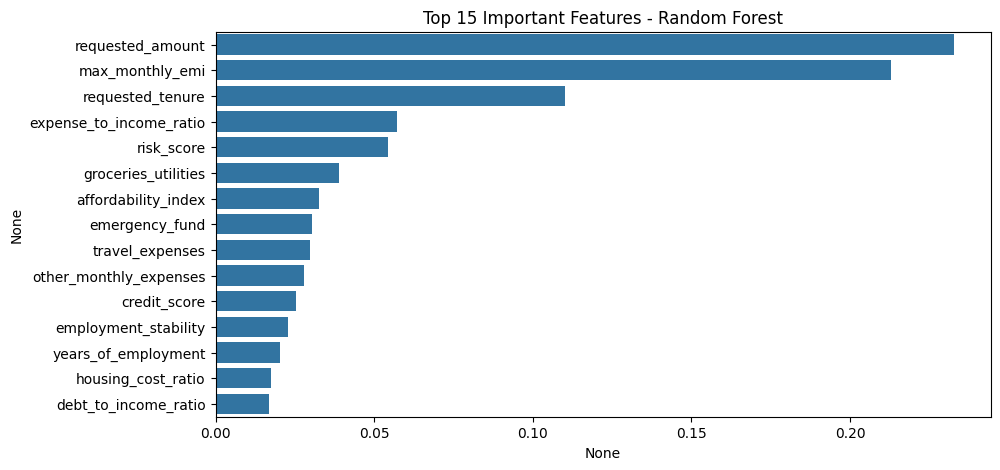

✅ Saved processed dataset with engineered features.


In [34]:
# For CLassification Models i have used :-
# Logistic Regression for baseline interpretable results
# Random Forest Classifier for feature importance analysis
# XGBoost Classifier for high-performance gradient boosting

import numpy as np
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(le.classes_, counts)))

from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Compute class weights
classes = np.unique(y)
class_weights = compute_class_weight('balanced', classes=classes, y=y)
class_weights_dict = dict(zip(classes, class_weights))
print("Class Weights:", class_weights_dict)

models = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000, 
        class_weight='balanced'
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200, 
        random_state=42, 
        n_jobs=-1, 
        class_weight='balanced'
    ),
    "XGBoost": XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42,
        scale_pos_weight=class_weights_dict.get(0, 1)
    )
}


results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    print(f"\n📈 Model: {name}")
    print("Accuracy:", round(acc,4))
    print("Classification Report:\n", classification_report(y_test, y_pred))

results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
display(results_df)
#  Identify Best Model and Log to MLflow
# ==========================================================
best_model_name = results_df.sort_values(by="Accuracy", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]
print(f"\n🏆 Best Model: {best_model_name}")

mlflow.set_experiment("EMI_Eligibility_Classification")

with mlflow.start_run(run_name=f"{best_model_name}_Run"):
    mlflow.log_param("Model", best_model_name)
    mlflow.log_metric("Accuracy", float(results_df[results_df.Model == best_model_name]['Accuracy']))
    mlflow.sklearn.log_model(best_model, "best_model")
    joblib.dump(scaler, "scaler.pkl")
    mlflow.log_artifact("scaler.pkl")
    print("✅ Model and Scaler logged to MLflow!")

# ==========================================================
# 🔟 Feature Importance (Random Forest)
# ==========================================================
if hasattr(models['Random Forest'], "feature_importances_"):
    importances = pd.Series(models['Random Forest'].feature_importances_, index=X.columns)
    top_features = importances.sort_values(ascending=False).head(15)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_features, y=top_features.index)
    plt.title("Top 15 Important Features - Random Forest")
    plt.show()

# ==========================================================
# ✅ Save Processed Dataset
# ==========================================================
df.to_csv("emi_processed_with_features.csv", index=False)
print("✅ Saved processed dataset with engineered features.")

XGBoost Has the Best Accuracy as compared to Random Forest and Logistic Regression

In [35]:
import joblib
joblib.dump(best_model, "best_classification_model.pkl")
joblib.dump(scaler, "scaler_classification.pkl")

['scaler_classification.pkl']

### Regression Model Training & Evaluation

In [36]:
# For Regression Models i have used :-
# Linear Regression for baseline performance
# Random Forest Regressor for ensemble-based predictions
# XGBoost Regressor for advanced gradient boosting

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

# ✅ Use your dataset variable df (already loaded and feature-engineered)
# We'll predict EMI amount using all other numeric features.

# If your dataset doesn't have a column 'emi_amount', we'll use 'current_emi_amount' as target
target_column = 'current_emi_amount'

if target_column not in df.columns:
    raise ValueError(f"❌ The column '{target_column}' is not found in dataset. Please check column names using df.columns")

# ----------------------------
# Prepare Regression Data
# ----------------------------
X_reg = df.drop(columns=[target_column, 'emi_eligibility'], errors='ignore')
y_reg = pd.to_numeric(df[target_column], errors='coerce').fillna(0)

# Keep only numeric features
X_reg = X_reg.select_dtypes(include=[np.number]).fillna(0)

# Split into train and test
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Standard scaling
scaler_r = StandardScaler()
X_train_r_scaled = scaler_r.fit_transform(X_train_r)
X_test_r_scaled = scaler_r.transform(X_test_r)

# ----------------------------
# Define Regression Models
# ----------------------------
reg_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(
        n_estimators=200, random_state=42, n_jobs=-1
    ),
    "XGBoost Regressor": XGBRegressor(
        n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42
    ),
}

reg_results = []

# ----------------------------
# Train and Evaluate
# ----------------------------
for name, model in reg_models.items():
    model.fit(X_train_r_scaled, y_train_r)
    y_pred_r = model.predict(X_test_r_scaled)

    mae = mean_absolute_error(y_test_r, y_pred_r)
    rmse = math.sqrt(mean_squared_error(y_test_r, y_pred_r))
    r2 = r2_score(y_test_r, y_pred_r)

    reg_results.append((name, mae, rmse, r2))

    print(f"\n📊 Regression Model: {name}")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")


📊 Regression Model: Linear Regression
MAE:  4089.3079
RMSE: 5422.7309
R²:   0.4061

📊 Regression Model: Random Forest Regressor
MAE:  148.3423
RMSE: 439.1997
R²:   0.9961

📊 Regression Model: XGBoost Regressor
MAE:  142.7834
RMSE: 423.0586
R²:   0.9964


In [37]:
reg_results_df = pd.DataFrame(reg_results, columns=["Model", "MAE", "RMSE", "R2_Score"])
display(reg_results_df)

,Model,MAE,RMSE,R2_Score
0,Linear Regression,4089.307873,5422.730913,0.406087
1,Random Forest Regressor,148.342292,439.199681,0.996104
2,XGBoost Regressor,142.783447,423.058562,0.996385


2025/11/01 20:50:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



🏆 Best Regression Model: XGBoost Regressor


2025/11/01 20:50:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Regression model logged to MLflow successfully!


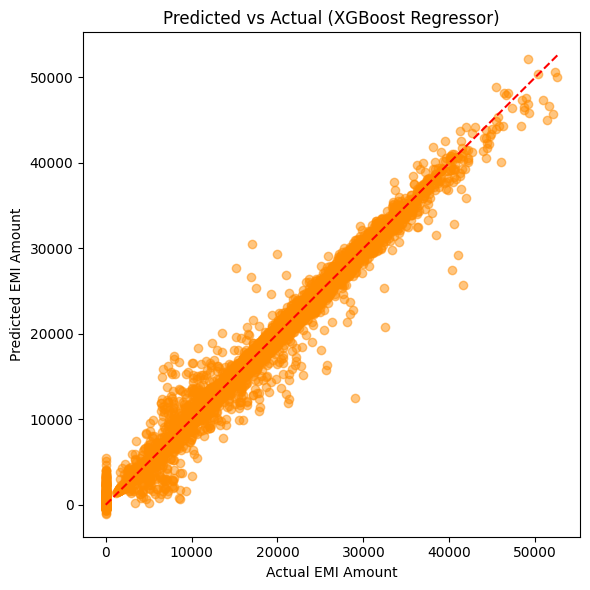

In [38]:
 # Identify Best Model and Log to MLflow
# ==========================================================
best_reg_model = reg_results_df.sort_values(by="R2_Score", ascending=False).iloc[0]
best_model_name_r = best_reg_model["Model"]
print(f"\n🏆 Best Regression Model: {best_model_name_r}")

mlflow.set_experiment("EMI_Amount_Regression")

with mlflow.start_run(run_name=f"{best_model_name_r}_Regression"):
    mlflow.log_param("Model", best_model_name_r)
    mlflow.log_metric("R2_Score", float(best_reg_model["R2_Score"]))
    mlflow.log_metric("MAE", float(best_reg_model["MAE"]))
    mlflow.log_metric("RMSE", float(best_reg_model["RMSE"]))
    mlflow.sklearn.log_model(reg_models[best_model_name_r], "best_regression_model")
    print("✅ Regression model logged to MLflow successfully!")

# ==========================================================
# 🔍 Plot Predicted vs Actual EMI Values (for best model)
# ==========================================================
best_model_r = reg_models[best_model_name_r]
y_pred_best = best_model_r.predict(X_test_r_scaled)

plt.figure(figsize=(6,6))
plt.scatter(y_test_r, y_pred_best, alpha=0.5, color='darkorange')
plt.xlabel("Actual EMI Amount")
plt.ylabel("Predicted EMI Amount")
plt.title(f"Predicted vs Actual ({best_model_name_r})")
plt.plot(
    [y_test_r.min(), y_test_r.max()],
    [y_test_r.min(), y_test_r.max()],
    'r--'
)
plt.tight_layout()
plt.show()

In [39]:
joblib.dump(best_model_r, "best_regression_model.pkl")
joblib.dump(scaler_r, "scaler_regression.pkl")

['scaler_regression.pkl']